## Mapping Visualization

This is a map-visualization of the FEMA data set. It shows the most frequent type of disaster by state and is categorized by color. The map is based on a Fema data set that is the most recent years.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [53]:
df = pd.read_csv('../datasets/df_fema.csv')

In [54]:
df.drop(columns='Unnamed: 0', inplace = True)

In [55]:
gdf = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

In [67]:
gdf = gdf[(gdf['NAME'] != 'Hawaii') & (gdf['NAME'] != 'Alaska') &
          (gdf['NAME'] != 'Puerto Rico') & (gdf['NAME'] != 'American Samoa') &
          (gdf['NAME'] != 'Commonwealth of the Northern Mariana Islands') &
          (gdf['NAME'] != 'Guam') & (gdf['NAME'] != 'United States Virgin Islands')]

In [69]:
group_df = df.groupby('state')[['incidentType']].agg(lambda x:x.value_counts().index[0]).reset_index()

In [71]:
all_gdf = pd.merge(gdf, group_df, left_on='STUSPS', right_on = 'state')

Text(0.5, 1, 'Most Common Natural Disaster in Each State')

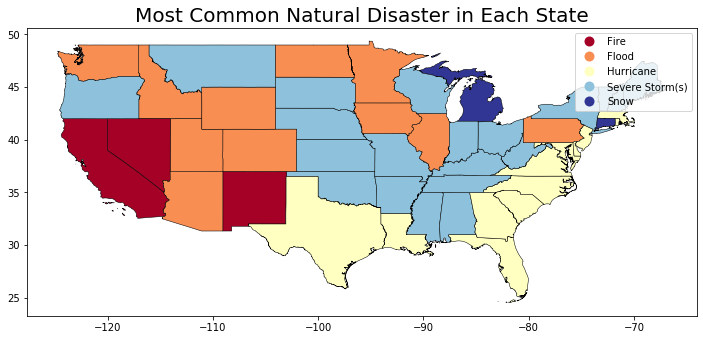

In [75]:
all_gdf.plot('incidentType', legend = True, figsize = (12,8), cmap = 'RdYlBu', edgecolor = 'k', linewidth = 0.5)
plt.title('Most Common Natural Disaster in Each State', fontsize = 20)